In [1]:
#import pandas as pd
#import seaborn as sns
import numpy as np

import cv2 #pip install opencv
import PIL.Image as Image #pip install pillow
import tensorflow as tf
#import tensorflow_hub as hub
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, plot_roc_curve, classification_report, accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dest_dir = "F:/Research/Monkeypox_dataset/"
dest_dir

'F:/Research/Monkeypox_dataset/'

In [3]:
import pathlib

dest_dir = pathlib.Path(dest_dir)
dest_dir

WindowsPath('F:/Research/Monkeypox_dataset')

In [4]:
image_dic={
    'Chickenpox': list(dest_dir.glob('Chickenpox/*')),
    'Measles': list(dest_dir.glob('Measles/*')),
    'Monkeypox': list(dest_dir.glob('Monkeypox/*')),
    'Normal': list(dest_dir.glob('Normal/*'))
}

In [5]:
image_labels={
    'Chickenpox': 0,
    'Measles': 1,
    'Monkeypox': 2,
    'Normal': 3
}

In [6]:
print(len(image_dic['Chickenpox']))
print(len(image_dic['Measles']))
print(len(image_dic['Monkeypox']))
print(len(image_dic['Normal']))

107
91
279
293


In [7]:
X, y = [], []

for image_name, images in image_dic.items():
    for image in images:
        img_array = cv2.imread(str(image))
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        resized_img = cv2.resize(RGB_img,(256,256))
        X.append(resized_img)
        y.append(image_labels[image_name])

In [8]:
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((770, 256, 256, 3), (770,))

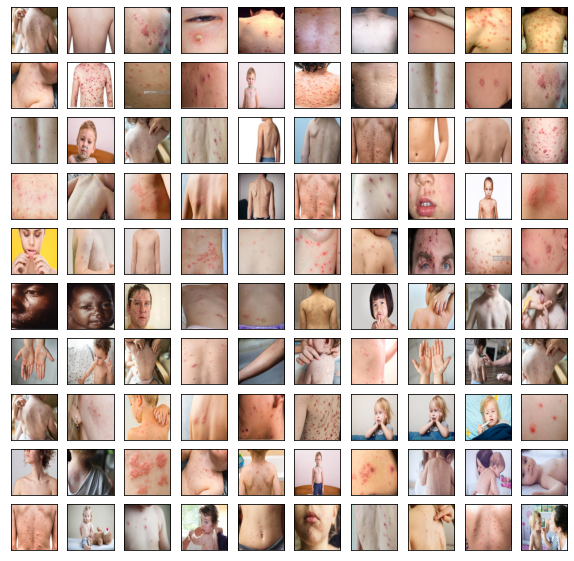

In [9]:
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
plt.show()

In [10]:
unique, counts = np.unique(y, return_counts=True)

dict(zip(unique, counts))

{0: 107, 1: 91, 2: 279, 3: 293}

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

In [12]:
unique, counts = np.unique(y_train, return_counts=True)

dict(zip(unique, counts))

{0: 82, 1: 78, 2: 214, 3: 242}

In [13]:
unique, counts = np.unique(y_test, return_counts=True)

dict(zip(unique, counts))

{0: 25, 1: 13, 2: 65, 3: 51}

In [14]:
X_train.shape, y_train.shape

((616, 256, 256, 3), (616,))

In [15]:
X_test.shape, y_test.shape

((154, 256, 256, 3), (154,))

In [16]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [17]:
img_shape = X_train.shape[1:]
print(img_shape)

(256, 256, 3)


In [19]:
base_model = tf.keras.applications.MobileNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=img_shape
)

In [20]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 64, 64, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 65, 65, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 32, 32, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 32, 32, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 16, 16, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 16, 16, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 16, 16, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 16, 16, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 16, 16, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 16, 16, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 16, 16, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 16, 16, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 8, 8, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 8, 8, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 8, 8, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 8, 8, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [21]:
base_model.trainable = False

In [23]:
MNV2_freeze = tf.keras.Sequential([
  base_model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(4, activation='softmax')
])

In [24]:
MNV2_freeze.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 4)                 5124      
                                                                 
Total params: 2,263,108
Trainable params: 5,124
Non-trainable params: 2,257,984
_________________________________________________________________


In [25]:
MNV2_freeze.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(
                          from_logits=False,
                          name='sparse_categorical_crossentropy'),
             metrics = ['accuracy'])

In [26]:
history = MNV2_freeze.fit(X_train_scaled, y_train, batch_size=16, verbose=2, epochs=150, validation_split=0.1) #validation_data=(X_test_scaled, y_test)

Epoch 1/150
35/35 - 10s - loss: 0.8993 - accuracy: 0.6516 - val_loss: 0.7163 - val_accuracy: 0.6613 - 10s/epoch - 284ms/step
Epoch 2/150
35/35 - 8s - loss: 0.5085 - accuracy: 0.8051 - val_loss: 0.6014 - val_accuracy: 0.8226 - 8s/epoch - 222ms/step
Epoch 3/150
35/35 - 8s - loss: 0.3878 - accuracy: 0.8791 - val_loss: 0.5451 - val_accuracy: 0.7581 - 8s/epoch - 225ms/step
Epoch 4/150
35/35 - 8s - loss: 0.3055 - accuracy: 0.9007 - val_loss: 0.4863 - val_accuracy: 0.7742 - 8s/epoch - 229ms/step
Epoch 5/150
35/35 - 8s - loss: 0.2564 - accuracy: 0.9188 - val_loss: 0.4622 - val_accuracy: 0.8065 - 8s/epoch - 222ms/step
Epoch 6/150
35/35 - 8s - loss: 0.2249 - accuracy: 0.9386 - val_loss: 0.4282 - val_accuracy: 0.8226 - 8s/epoch - 222ms/step
Epoch 7/150
35/35 - 8s - loss: 0.1881 - accuracy: 0.9603 - val_loss: 0.4364 - val_accuracy: 0.8387 - 8s/epoch - 220ms/step
Epoch 8/150
35/35 - 8s - loss: 0.1635 - accuracy: 0.9711 - val_loss: 0.4337 - val_accuracy: 0.8226 - 8s/epoch - 221ms/step
Epoch 9/150
35

Epoch 68/150
35/35 - 8s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.4820 - val_accuracy: 0.9032 - 8s/epoch - 220ms/step
Epoch 69/150
35/35 - 8s - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.4907 - val_accuracy: 0.9032 - 8s/epoch - 221ms/step
Epoch 70/150
35/35 - 8s - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.4827 - val_accuracy: 0.9032 - 8s/epoch - 218ms/step
Epoch 71/150
35/35 - 8s - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.4914 - val_accuracy: 0.9032 - 8s/epoch - 221ms/step
Epoch 72/150
35/35 - 8s - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.4908 - val_accuracy: 0.9032 - 8s/epoch - 218ms/step
Epoch 73/150
35/35 - 8s - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.4884 - val_accuracy: 0.9032 - 8s/epoch - 220ms/step
Epoch 74/150
35/35 - 8s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.4905 - val_accuracy: 0.9032 - 8s/epoch - 216ms/step
Epoch 75/150
35/35 - 8s - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.4941 - val_accuracy: 0.9032 - 8s/epoch - 221ms/step
Epoch 76

Epoch 134/150
35/35 - 8s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5709 - val_accuracy: 0.9032 - 8s/epoch - 221ms/step
Epoch 135/150
35/35 - 8s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5688 - val_accuracy: 0.9032 - 8s/epoch - 220ms/step
Epoch 136/150
35/35 - 8s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5723 - val_accuracy: 0.9032 - 8s/epoch - 218ms/step
Epoch 137/150
35/35 - 8s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.5717 - val_accuracy: 0.9032 - 8s/epoch - 217ms/step
Epoch 138/150
35/35 - 8s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.5723 - val_accuracy: 0.9032 - 8s/epoch - 221ms/step
Epoch 139/150
35/35 - 8s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.5759 - val_accuracy: 0.9032 - 8s/epoch - 216ms/step
Epoch 140/150
35/35 - 8s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.5769 - val_accuracy: 0.9032 - 8s/epoch - 223ms/step
Epoch 141/150
35/35 - 8s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5778 - val_accuracy: 0.9032 - 8s/epoch - 218ms/step


In [28]:
MNV2_freeze.evaluate(X_test_scaled, y_test)

5/5 [==============================] - 2s 349ms/step - loss: 0.4750 - accuracy: 0.8961


[0.47495028376579285, 0.8961039185523987]

Text(0.5, 1.0, 'Training and Validation Accuracy')

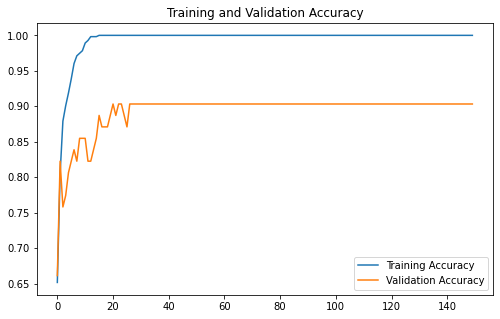

In [29]:
epochs = 150
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


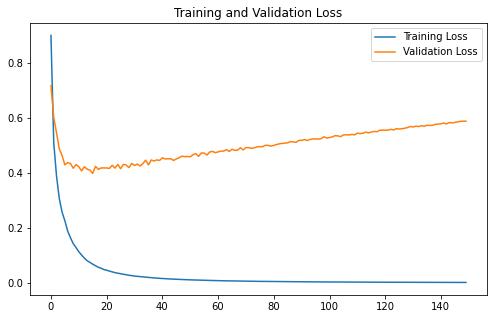

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix, plot_roc_curve, classification_report, accuracy_score, classification_report

y_pred = MNV2_freeze.predict(X_test_scaled) #### 3-dimentional

y_pred1 = np.array(list(map(lambda x: np.argmax(x), y_pred))) #pred_prob = np.argmax(y_pred, axis=1) ## 1-dimentional
    
clr = classification_report(y_test, y_pred1)
    
print(clr)

5/5 [==============================] - 2s 351ms/step
              precision    recall  f1-score   support

           0       0.83      0.60      0.70        25
           1       0.92      0.85      0.88        13
           2       0.91      0.94      0.92        65
           3       0.89      1.00      0.94        51

    accuracy                           0.90       154
   macro avg       0.89      0.85      0.86       154
weighted avg       0.89      0.90      0.89       154



[[15  0  6  4]
 [ 2 11  0  0]
 [ 1  1 61  2]
 [ 0  0  0 51]]


'sns.heatmap(cmRF, annot=True, fmt=\'d\')\nplt.xlabel("Predicted")\nplt.ylabel("Actual")\nplt.title("Confusion Matrix")'

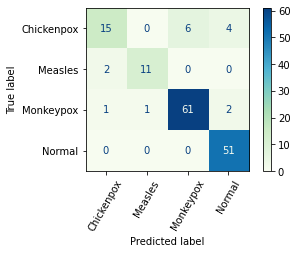

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

cmRF = confusion_matrix(y_test, y_pred1)
print(cmRF)

display_cm = ConfusionMatrixDisplay(cmRF, display_labels=image_labels.keys())
fig,ax = plt.subplots(figsize=(5,3))
display_cm.plot(cmap='GnBu', ax=ax, xticks_rotation=60)

'''sns.heatmap(cmRF, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")'''


In [33]:
y_pred = MNV2_freeze.predict(X_test_scaled)

from sklearn.metrics import roc_curve, auc
import sklearn

sklearn.metrics.roc_auc_score(y_test, y_pred, multi_class='ovr')

5/5 [==============================] - 2s 345ms/step


0.9721901050877977

In [34]:
from tensorflow.keras.utils import to_categorical
y_test_cat = tf.keras.utils.to_categorical(y_test)
y_test_cat

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],


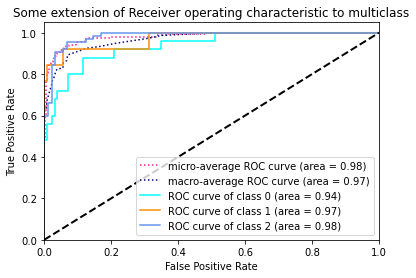

In [35]:
n_classes=3
 
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_cat[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_cat.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


lw=2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
from itertools import cycle
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle="dotted",
    linewidth=1.5,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle="dotted",
    linewidth=1.5,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=1.5,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

In [36]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred1)

0.8445229681978799

In [37]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred)

0.47495024903496785

In [38]:
MNV2_freeze.save("Saved Models/MNV2_freeze.h5")